In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [77]:
gdf = pd.read_csv('_SELECT_goalDate_count_DISTINCT_gameID_as_games_count_as_goals_c.csv')
gdf['goalDate'] = pd.to_datetime(gdf['goalDate'], format='%Y-%m-%d')
gdf = gdf.set_index('goalDate')

In [78]:

x = gdf[['games']]
y = gdf[['goals']]
a, b = np.polyfit(gdf['games'], gdf['goals'], 1)

regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)

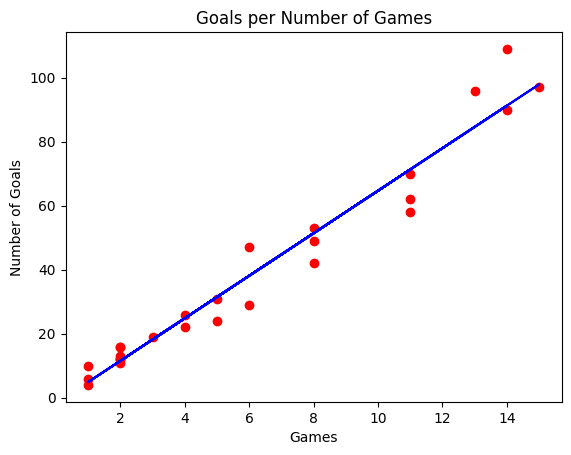

In [79]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Goals per Number of Games')
plt.xlabel('Games')
plt.ylabel('Number of Goals')
plt.show()

In [80]:
print(f'Regression Score of {regressor.score(x,y)}')
print(f'Regression coefficient of  {regressor.coef_[0][0]}')
print(f'Regression crosses y at  {regressor.intercept_[0]}')

Regression Score of 0.9563960095908588
Regression coefficient of  6.644057542350095
Regression crosses y at  -1.7400510890024208
